# KNN - *from scratch*

In [54]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter


### *Fn to calculate most counts*

* *used to analyse which group has more share in k for given test-data*

In [71]:
# def most_common(labels):
#     return Counter(labels).most_common(1)[0][0]

def most_common(lst):
    return max(set(lst), key=lst.count)

### *Fn to calculate Euclidean Distance*

In [70]:
# def euclidean(features , test_data):
#     return np.sqrt(np.sum((features - test_data)**2, axis=1))

def euclidean(features, test_data):
    test_data = np.array(test_data)  # Convert test_data to numpy array
    return np.sqrt(np.sum((features - test_data.reshape(len(test_data), -1))**2, axis=1))

### *KNN - implementation*

In [48]:
class KNeighborsClassifier:
    def __init__(self , k=5 , dist_metric = euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self , X_train , Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = [self.dist_metric(x, x_train) for x_train in self.X_train]
            y_sorted = [y for _, y in sorted(zip(distances, self.Y_train))]
            neighbors.append(y_sorted[:self.k])
        return [most_common(n) for n in neighbors]
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    

### *Testing*

In [68]:
df = pd.read_csv('/home/balerion/Desktop/leetcode_Ai/Ai/dataset/breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')

df.replace('?'  ,-99999 , inplace=True) # handling the absent data
df.drop('id',axis=1,inplace=True)

X = np.array(df.drop(['class'],axis = 1))
# print(X.shape[0])

Y = np.array(df['class'])
# print(Y.size)

### *Split data into train & test sets*

### *Preprocess data*

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

In [26]:
accuracies = []
ks = range(1, 100)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

### *Performance of model as we increase our k*

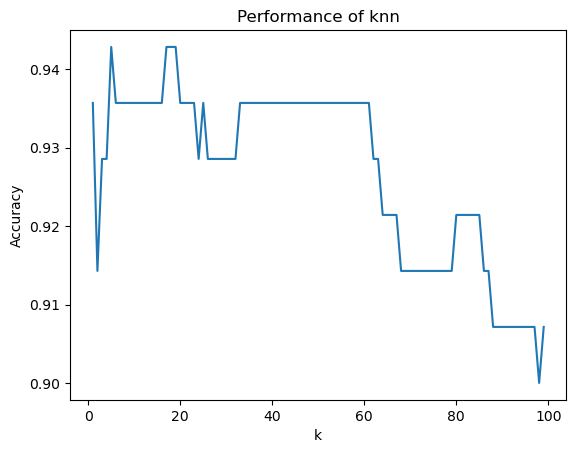

In [27]:
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

## Note:
### *As we increase our k, the accuracy decreases. This indicates that the model works better at a lower k value.*